# Tally α

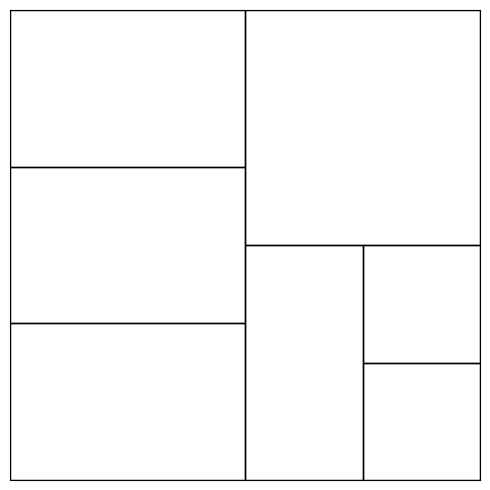

In [1]:
from tally import H, V, e

composition = V(e, e, e) | e & H(e, e & e)

composition.plot()

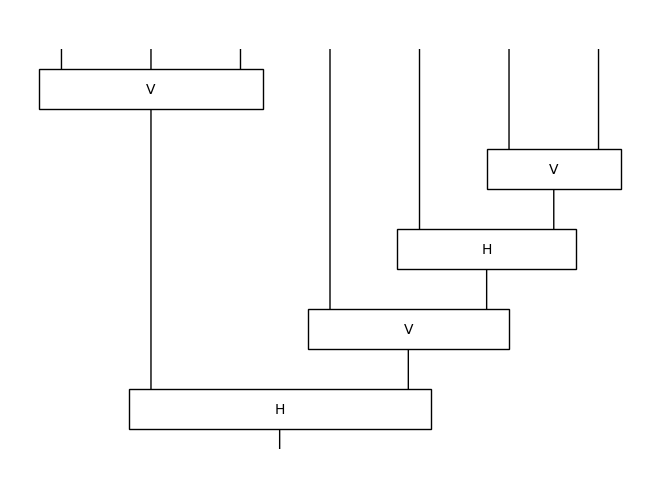

In [2]:
diagram = composition.to_diagram()
diagram.draw()

In [8]:
from numpy.random import rand

from discopy.monoidal import PRO
from discopy.markov import Functor, Category
from discopy.quantum import qubit, Ty, Circuit, Discard, Measure, IQPansatz, Bits

DEPTH, N_QUBITS = 1, 1

signature = set(diagram.boxes)
params0 = {box: rand(DEPTH, N_QUBITS * len(box.dom) - 1) for box in diagram.boxes}

def ansatz(box, params):
    return IQPansatz(N_QUBITS * len(box.dom), params)\
        >> Discard((len(box.dom) - 1) // 2) @ qubit @ Discard(len(box.dom) // 2)

F = lambda params: Functor(
    ob={PRO(1): qubit},
    ar={box: ansatz(box, params[box]) for box in signature},
    cod=Category(Ty, Circuit))

F0 = F(params0)

circuit = F0(diagram) >> Measure() >> Bits(0)[::-1]

In [11]:
from pytket.circuit.display import get_circuit_renderer
from pytket.extensions.qiskit import AerBackend

circuit_renderer = get_circuit_renderer()
circuit_renderer.min_height = "500px"

circuit_renderer.render_circuit_jupyter(circuit.to_tk())

backend = AerBackend()
circuit.eval(backend=backend, compilation=backend.default_compilation_pass())

/Users/alexis.toumi/.pyenv/versions/3.10.9/lib/python3.10/site-packages/discopy/matrix.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  self.array = np.array(array, dtype=self.dtype).reshape((dom, cod))


Tensor[float]([0.16210938], dom=Dim(1), cod=Dim(1))